In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from scipy import stats
mpl.rcParams['figure.dpi'] = 150
sns.set()

In [22]:
milk = pd.read_csv("AllMilkingsDaily_Weather_Filtered.csv")
milk["Timestamp"] = pd.to_datetime(milk["Timestamp"])
milk = milk.set_index("Timestamp")

milk = milk[milk["FarmName_Pseudo"].isin(["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"])]

In [23]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

farmNames = milk["FarmName_Pseudo"].unique()
farmNames = sorted(farmNames)

In [24]:
cowNames = milk["SE_Number"].unique()

In [25]:
randomCowName = np.random.choice(cowNames)
cow = milk[milk["SE_Number"] == randomCowName]

In [26]:
colors = ["#00b0b9", "#ffb81c"]
customPalette = sns.set_palette(sns.color_palette(colors))

Text(0.5, 1.0, 'Filtering by frequency')

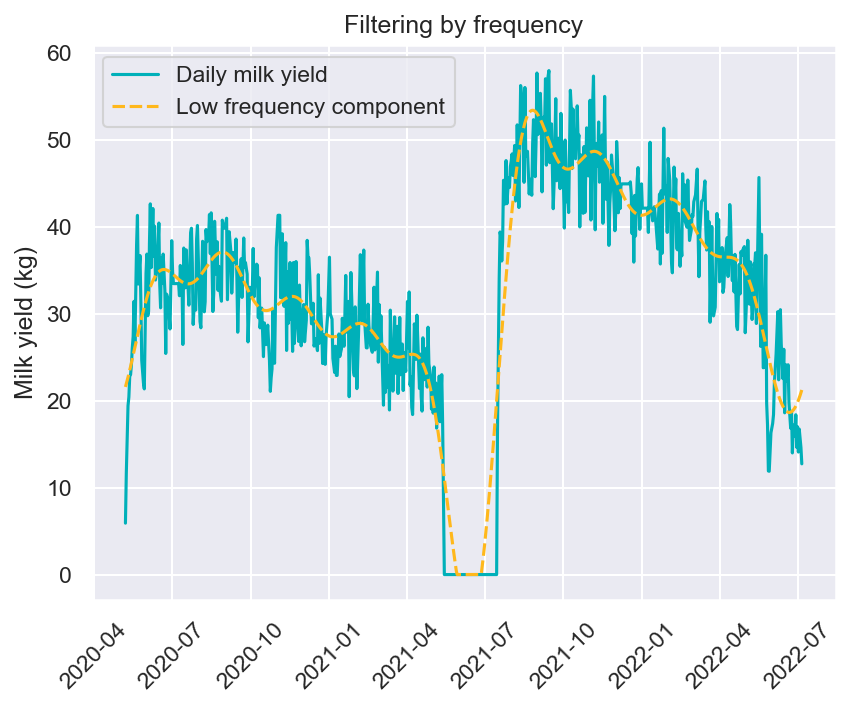

In [27]:
sns.lineplot(cow[["DailyYield", "DailyYield_lf"]], errorbar=None)
plt.legend(["Daily milk yield", "Low frequency component"])
plt.xlabel("")
plt.ylabel("Milk yield (kg)")
plt.xticks(rotation = 45)
plt.title("Filtering by frequency")

Text(0.5, 1.0, 'Filtering by frequency')

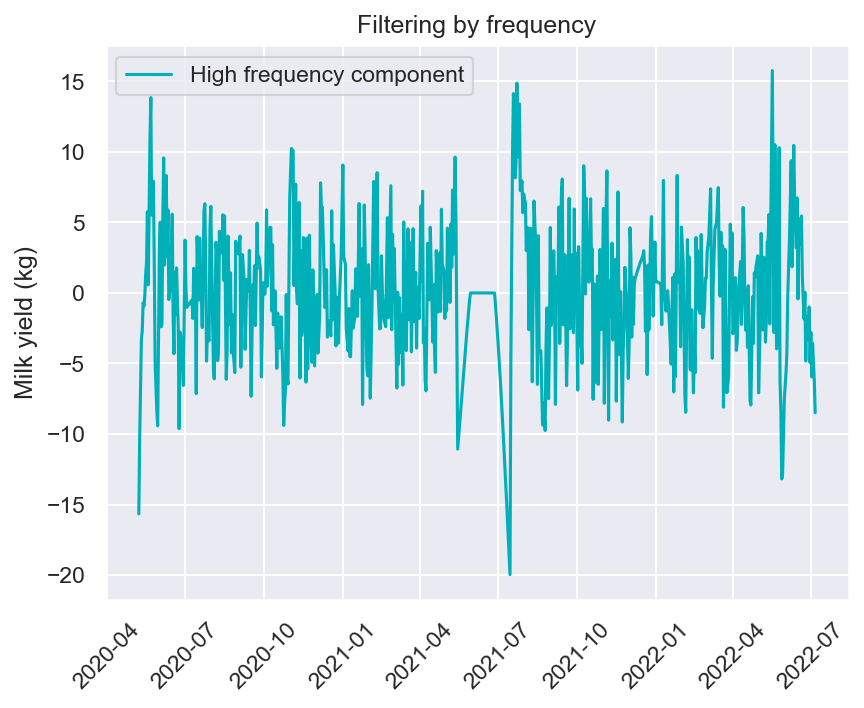

In [28]:
sns.lineplot(cow[ "DailyYield_hf"], errorbar=None)
plt.legend(["High frequency component"])
plt.xlabel("")
plt.ylabel("Milk yield (kg)")
plt.xticks(rotation = 45)
plt.title("Filtering by frequency")

In [29]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    pCorr = farm["DailyYield"].corr(farm["T_C_mean"])
    pCorrFiltered = farm["DailyYield_hf"].corr(farm["T_C_mean"])

    print(f"The correlation for {name} was:")
    print(f"{pCorr} before filtering and")
    print(f"{pCorrFiltered} after filtering")
    print("")

The correlation for Farm 1 was:
-0.03729901895414397 before filtering and
-0.004282391637610712 after filtering

The correlation for Farm 2 was:
-0.09881191632422216 before filtering and
-0.014762979979927896 after filtering

The correlation for Farm 3 was:
-0.0016802349477557227 before filtering and
-0.003792498281336067 after filtering

The correlation for Farm 5 was:
-0.0001708396049702734 before filtering and
0.00583417054996801 after filtering

The correlation for Farm 7 was:
0.01345258640798052 before filtering and
-0.00016488318696144576 after filtering

The correlation for Farm 8 was:
-0.10199534585797318 before filtering and
-0.03206860604586539 after filtering

The correlation for Farm 9 was:
0.015931644737099078 before filtering and
0.00767155650783651 after filtering

